In [23]:
!pip install numpy scipy matplotlib scikit-image
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.fft import fft2
from scipy.ndimage import gaussian_filter
from skimage.filters import unsharp_mask
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2
import numpy as np


In [42]:
# Create a 2D Gaussian low-pass filter
def fspecial_gaussian(size, sigma):
    x, y = np.meshgrid(np.arange(-size // 2 + 1, size // 2 + 1), np.arange(-size // 2 + 1, size // 2 + 1))
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return g / g.sum()
# Create a 2D circular averaging filter (LOW pass)
def fspecial_disk(radius):
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel = np.zeros((2*radius+1, 2*radius+1))
    kernel[mask] = 1
    return kernel / np.sum(mask)


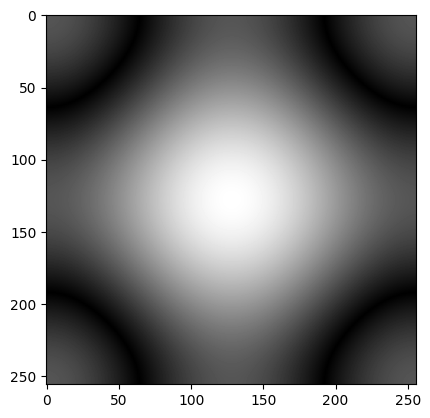

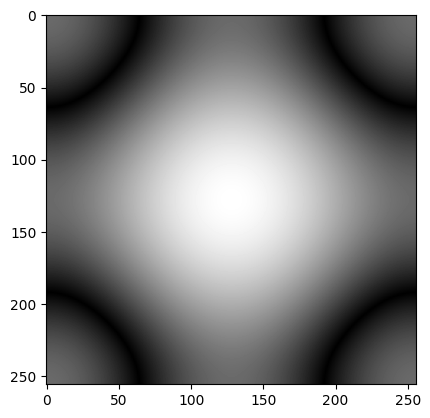

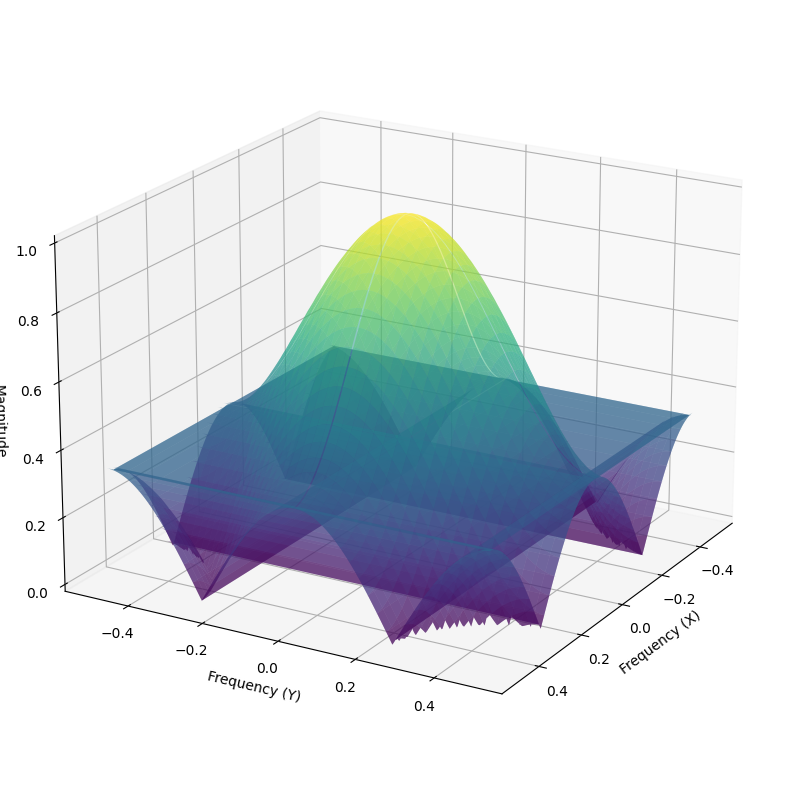

In [51]:


# Parameters
N = 256
radius = 32  # Adjust the radius of the disk filter as needed

# Create a 2D impulse in the center
big = np.zeros((N, N))
big[N // 2, N // 2] = 1

# Create the circular averaging filter
#h = fspecial_disk(radius=8)



h = np.array([[0, 1/6, 0], [1/6, 1/3, 1/6], [0, 1/6, 0]])  # Custom filter


# Create an unsharp mask kernel, high pass
#h = np.array([[0, -1, 0],
#             [-1, 5, -1],
#              [0, -1, 0]])


# Apply the filter to the image
h1 = cv2.filter2D(big, -1, h)

# Compute the 2D Fourier Transform
S = np.fft.fft2(h1)
SM = np.abs(S)

# Display the spectrum
plt.figure()
plt.imshow(np.fft.fftshift(SM / np.max(SM)), cmap='gray')

# Display the spectrum in log scale
plt.figure()
IMd = np.log(1 + abs(SM))
plt.imshow(np.fft.fftshift(IMd / np.max(IMd)), cmap='gray')

plt.show()

# Create a meshgrid for the frequencies
frequencies_x = np.fft.fftfreq(N, 1.0)
frequencies_y = np.fft.fftfreq(N, 1.0)
X, Y = np.meshgrid(frequencies_x, frequencies_y)

# Create a 3D plot
# Create a 3D plot
fig = plt.figure(figsize=(10, 10))  # Adjust the figure size
ax = fig.add_subplot(111, projection='3d')

# Set axis labels
ax.set_xlabel('Frequency (X)')
ax.set_ylabel('Frequency (Y)')
ax.set_zlabel('Magnitude')

# Define the range for the z-axis to zoom in on peaks
z_min = 0
z_max = np.max(SM)  # Adjust this value to control the zoom level

# Rotate the view to better see the magnitude values
#ax.view_init(azim=45, elev=45)
ax.view_init(elev=20, azim=30)  # Adjust elevation (up-down) and azimuth (rotation around z-axis)

# Adjust the z-axis limits and scaling
ax.set_zlim(z_min, z_max)
ax.plot_surface(X, Y, SM, cmap='viridis', vmin=z_min, vmax=z_max,alpha=0.5)

plt.show()

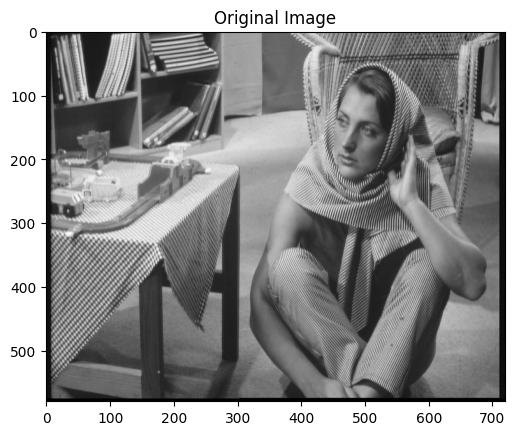

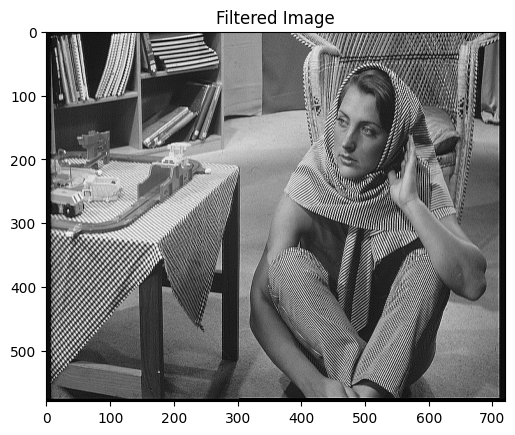

In [47]:
from PIL import Image
import cv2
from scipy.ndimage import gaussian_filter, convolve
# Define the filter
#h = np.array([[0, 1/6, 0], [1/6, 1/3, 1/6], [0, 1/6, 0]])
#h = h / np.sum(h)  # Normalize the filter


# Load the image (replace 'image_path' with the actual path to your image)
original_image = Image.open('barbara.gif').convert('L')
# Convertir la imagen a un array numpy
b = np.array(original_image)


# Display the original image
plt.imshow(b, cmap='gray')
plt.title('Original Image')
plt.show()


# Create the circular averaging filter
#h = fspecial_disk(radius=8)


# Create an unsharp mask kernel
h = np.array([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]])


# Apply the filter to the image
h1 = cv2.filter2D(b, -1, h)


# Convolve the image with the filter h
#h1 = convolve(b, h, mode='constant')

# Display the filtered image
plt.imshow(h1, cmap='gray')
plt.title('Filtered Image')
plt.show()

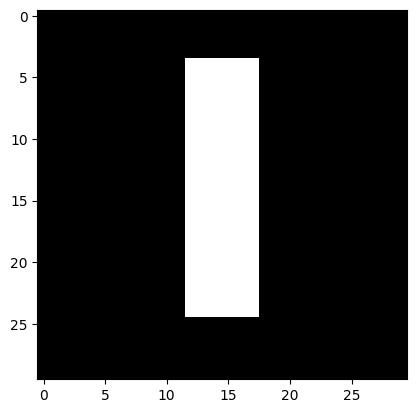

0.0
126.0


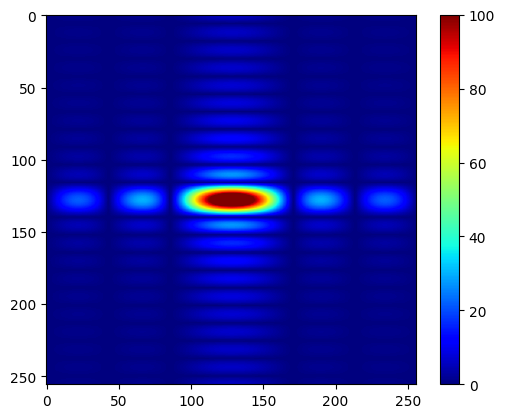

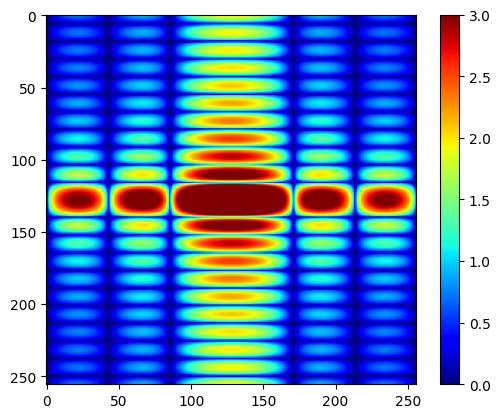

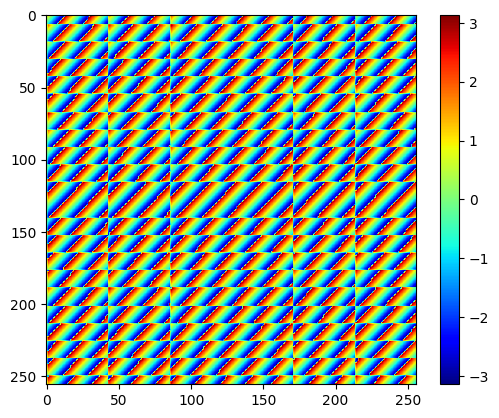

In [52]:
#spect.m
# Prepare image--> imagen de un rectangulo
f = np.zeros((30, 30))
f[4:25, 12:18] = 1
plt.imshow(f, cmap='gray')
plt.show()

# Compute Fourier Transform
F = np.fft.fft2(f, (256, 256))
F = np.fft.fftshift(F)  # Center FFT

# Measure the minimum and maximum value of the transform amplitude
print(np.min(np.abs(F)))  # 0.0
print(np.max(np.abs(F)))  # 100.0

#espectro
plt.figure()
plt.imshow(np.abs(F), cmap='jet', vmin=0, vmax=100)
plt.colorbar()
plt.show()

#espectro es con logaritmo, realsa lo que no se ve tanto
plt.figure()
plt.imshow(np.log(1 + np.abs(F)), cmap='jet', vmin=0, vmax=3)
plt.colorbar()
plt.show()

# Look at the phases
plt.figure()
plt.imshow(np.angle(F), cmap='jet', vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()

In [56]:
def downsampling(I, m, filter_on=False):
    # Get the dimensions of the input image
    N, M = I.shape
    
    # Apply ideal filter
    w = 1 / m
    F = np.fft.fftshift(np.fft.fft2(I))
    
    if filter_on:
        for i in range(N):
            for j in range(M):
                r2 = (i - round(N / 2))**2 + (j - round(M / 2))**2
                
                if r2 > round((N / 2 * w)**2):
                    F[i, j] = 0 #a partir de cierto radio, el espectro va con 0
    
    Idown = np.real(np.fft.ifft2(np.fft.fftshift(F)))
    
    # Now downsample
    Idown = cv2.resize(Idown, (N // m, M // m), interpolation=cv2.INTER_NEAREST)
    
    return Idown

def upsampling(I, m):
    # Get the dimensions of the input image
    N, M = I.shape
    
    # Create an empty output image
    Iup = np.zeros((m * N, m * M))
    
    # Expand input image
    for i in range(N):
        for j in range(M):
            Iup[m * i:m * (i + 1), m * j:m * (j + 1)] = I[i, j]
    
    # Ideal filter
    N, M = Iup.shape
    w = 1 / m
    F = np.fft.fftshift(np.fft.fft2(Iup))
    
    for i in range(N):
        for j in range(M):
            r2 = (i - round(N / 2))**2 + (j - round(M / 2))**2
            if r2 > round((N / 2 * w)**2):
                F[i, j] = 0
    
    Iup = (m**2) * np.abs(np.fft.ifft2(np.fft.fftshift(F)))
    
    return Iup

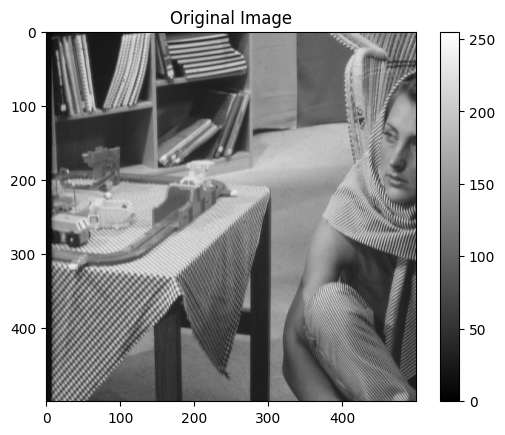

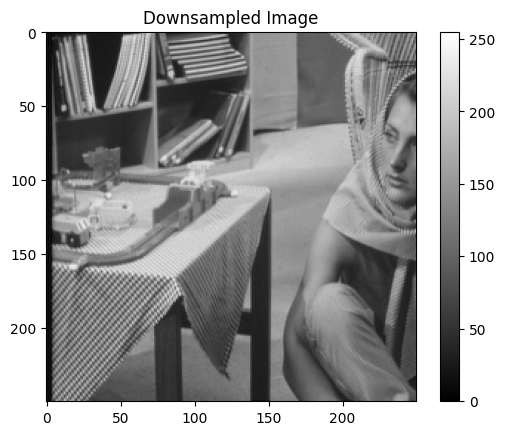

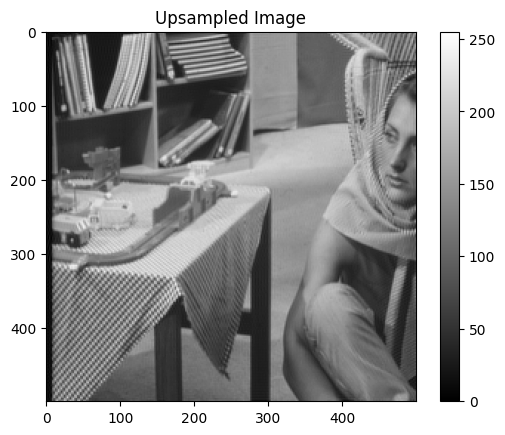

In [58]:

original_image = Image.open('barbara.gif').convert('L')
b = np.array(original_image)

# Crop the image to 500x500
f1 = b[:500, :500]

# Define the downsampling factor 'm'
m = 2

f2 = downsampling(f1, m, filter_on=True)
# f2 = downsampling(f1, m, FILTER_OFF)

# Define the upsampling function
def upsampling(image, factor):
    return cv2.resize(image, (image.shape[1] * factor, image.shape[0] * factor), interpolation=cv2.INTER_NEAREST)

# Perform upsampling
f3 = upsampling(f2, m)

# Display the images
plt.figure()
plt.imshow(f1, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.colorbar()

plt.figure()
plt.imshow(f2, cmap='gray', vmin=0, vmax=255)
plt.title('Downsampled Image')
plt.colorbar()

plt.figure()
plt.imshow(f3, cmap='gray', vmin=0, vmax=255)
plt.title('Upsampled Image')
plt.colorbar()

plt.show()

In [59]:
!pip install imageio opencv-python

In [83]:
import imageio
# Load the image
original_image = Image.open('barbara.gif').convert('L')
b = np.array(original_image)
ysize, xsize = b.shape

# Define the video size
video_size = (xsize, ysize)

# Create video writers
fourcc = cv2.VideoWriter_fourcc(*'XVID')
mov_pics = cv2.VideoWriter('aliasing_pics.avi', fourcc, 10, video_size, isColor=False)
mov_specs = cv2.VideoWriter('aliasing_specs.avi', fourcc, 10, video_size, isColor=False)

for xshrink in range(0, 601, 5):
    desiredxsize = xsize - xshrink
    scale_shrink = desiredxsize / xsize
    T = np.array([[scale_shrink, 0, 0], [0, scale_shrink, 0]], dtype=np.float32)
    f2 = cv2.warpAffine(b, T, (xsize, ysize))
    currentysize, currentxsize = f2.shape
    
    scale_boost = xsize / currentxsize
    Tinv = np.array([[scale_boost, 0, 0], [0, scale_boost, 0]], dtype=np.float32)
    f3 = cv2.warpAffine(f2, Tinv, (xsize, ysize))
    Fd = np.fft.fftshift(np.log(1 + np.abs(np.fft.fft2(f3))))
    
    xshrink
    fr = (f3 / np.max(f3) * 255).astype(np.uint8)
    Fdr = (Fd / np.max(Fd) * 255).astype(np.uint8)

 
    
    mov_pics.write(fr)
    mov_specs.write(Fdr)

mov_pics.release()
mov_specs.release()